In [186]:
import pandas as pd
from scipy import sparse
from scipy.sparse.linalg import spsolve
import numpy as np
import bokeh
import matplotlib.pyplot as plt
from collections.abc import Iterable
import sys
import os
sys.path.insert(0, '/Users/kedzie/repos/notebooks/utilities')
from utility_functions.utils import *

from matplotlib import rcParams as rc
rc['mathtext.default'] = 'regular'

In [187]:
def read_raman(filename):
    #read first line of file
    header = pd.read_csv(filename, sep ='\t', nrows=1, encoding='latin1')
    
    #read the data chunk of the file by skipping the header-1 lines
    df = pd.read_csv(filename, sep ='\t', skiprows=2, encoding='latin1', names =['freq','ccd'])    
    return df
def find_max(data, f1, f2):
    x1= getnearpos(data['freq'], f1)
    x2=getnearpos(data['freq'], f2)
    maxx= data['ccd'].iloc[x1]
    
    for i in range (x1,x2):
        if data['ccd'].iloc[i]> maxx:
            maxx=data['ccd'].iloc[i]   
    print(maxx)
    return maxx

def baseline_als(y, lam, p, niter=10):
    L = len(y)
    D = sparse.diags([1,-2,1],[0,-1,-2], shape=(L,L-2))
    w = np.ones(L)
    for i in range(niter):
        W = sparse.spdiags(w, 0, L, L)
        Z = W + lam * D.dot(D.transpose())
        z = spsolve(Z, w*y)
        w = p * (y > z) + (1-p) * (y < z)
    return z

(150, 500)

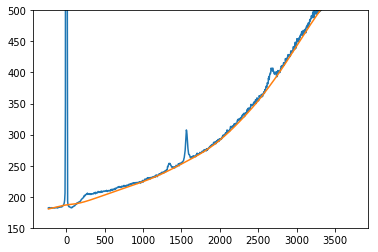

In [203]:

os.chdir('/Users/kedzie/Desktop/Elyse Raman Samples 190619/')
mcmb= read_raman('1 Single Spectrum_003_Spec.Data 1.txt')
supe=read_raman('6 Single Spectrum_011_Spec.Data 1.txt')
pred=read_raman('01 Single Spectrum_020_Spec.Data 1.txt')
c13=read_raman('11 Single Spectrum_030_Spec.Data 1.txt')
p50=read_raman('16 Single Spectrum_035_Spec.Data 1.txt')

# p50['ccd']=(p50['ccd']-182)/226.8*100
# c13['ccd']=(c13['ccd']-182)/135.9*100
# pred['ccd']=(pred['ccd']-182)/125.5*100
# supe['ccd']=(supe['ccd']-182)/56.6*100
# mcmb['ccd']=(mcmb['ccd']-182)/36*100

base_mcmb = baseline_als(mcmb['ccd'], 100000, 0.001)
base_supe = baseline_als(supe['ccd'], 100000, 0.001)
base_pred = baseline_als(pred['ccd'], 100000, 0.01)
base_c13 = baseline_als(c13['ccd'], 10000000, 0.005)
base_p50 = baseline_als(p50['ccd'], 100000, 0.01)


plt.figure()

plt.plot(pred.freq, pred.ccd, label= 'pred')
plt.plot(pred.freq, base_pred, label= 'pred')
plt.ylim(150,500)

# plt.plot(supe.freq, supe.ccd/33.5*100, label= 'superior')
# plt.plot(mcmb.freq, mcmb.ccd/27*100, label='mcmb')



In [ ]:

mcmb['ccd']= mcmb['ccd'] - base_mcmb
supe['ccd']= supe['ccd'] - base_supe
pred['ccd']= pred['ccd'] - base_pred
c13['ccd']= c13['ccd'] - base_c13
p50['ccd'] = p50['ccd'] - base_p50

plt.figure()
# plt.plot(pred['freq'], base_pred)
# plt.plot(pred['freq'], pred['ccd'])
plt.plot(mcmb['freq'], mcmb['ccd'])
plt.plot(c13['freq'], c13['ccd'])
plt.ylim(0,100)

202.67432903363334
97.33373101069225
50.65830675830097
33.48007183733631
27.146815483717745


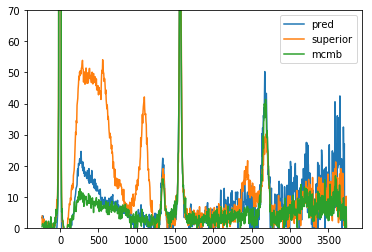

In [198]:
p1= find_max(p50,1500,2000)
p2= find_max(c13,900,1300)
p5= find_max(pred,1500,1700)
p4= find_max(supe,1500,1700)
p3= find_max(mcmb,1500,1700)

plt.figure()

# plt.plot(p50.freq, p50.ccd/202*100, label= 'p50')
# plt.plot(c13.freq, c13.ccd/97.3*100, label= 'C13')
plt.plot(pred.freq, pred.ccd/50.7*100, label= 'pred')
plt.plot(supe.freq, supe.ccd/33.5*100, label= 'superior')
plt.plot(mcmb.freq, mcmb.ccd/27*100, label='mcmb')




plt.ylim(0,70)
plt.legend()

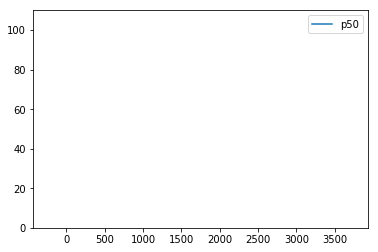

In [185]:
plt.figure()
plt.plot(p50.freq, p50.ccd, label= 'p50')


plt.ylim(0,110)
plt.legend()


In [90]:
print(c13['ccd'].iloc[5:20])
    

5     182.6
6     182.0
7     182.1
8     181.8
9     182.1
10    182.3
11    182.2
12    182.2
13    182.5
14    182.1
15    182.5
16    181.8
17    182.3
18    182.8
19    182.4
Name: ccd, dtype: float64
